In [1]:
import itertools
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from gensim.corpora.dictionary import Dictionary

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Named-entity recognition
### 1.1. Theory
#### What is Named Entity Recognition?
`Named Entity Recognition` or `NER` for short is a natural language processing task used to identify important named entities in the text -- such as people, places and organizations -- they can even be dates, states, works of art and other categories depending on the libraries and notation you use. 

`NER` can be used alongside `topic identification`, or on its own to `determine important items` in a text or answer basic natural language understanding questions such as who? what? when and where?

#### Example of NER
For example, take this piece of text which is from the `English Wikipedia article on Albert Einstein`. 

The `text` has been **highlighted** for different types of named entities that were found using the `Stanford NER` library. You can see the dates, locations, persons and organizations found and extract infomation on the text based on these named entities. 

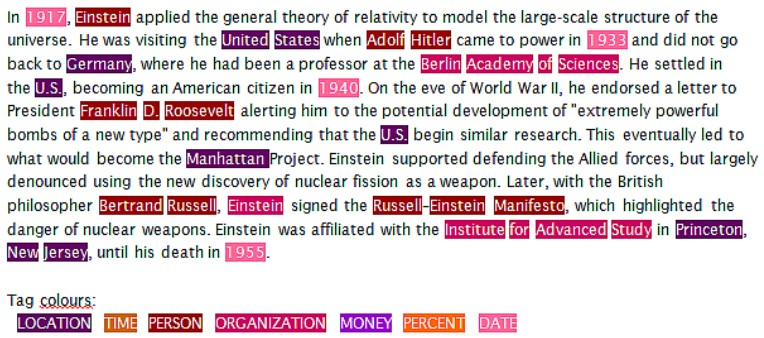

In [2]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

You can use `NER` to solve problems like `fact extraction` as well as which entities are related using computational language models. 

For example, in this text we can see that Einstein has something to do with the United States, Adolf Hitler and Germany. We can also see by token proximity that Betrand Russel and Einstein created the Russel-Einstein manifesto -- all from simple entity highlighting.

#### nltk and the Stanford CoreNLP Library
`NLTK` allows you to interact with named entity recognition via it's own model, but also the aforementioned Stanford library. 

The Stanford library integration requires you to perform a few steps before you can use it, including installing the required `Java` files and setting system environment variables. 

You can also use the standford library on its own without integrating it with `NLTK` or operate it as an API server. The stanford `CoreNLP` library has great support for named entity recognition as well as some related nlp tasks such as `coreference` (or `linking pronouns` and `entities` together) and dependency trees to help with parsing meaning and relationships amongst words or phrases in a sentence.

#### Using nltk for Named Entity Recognition
For our simple use case, we will use the built-in named entity recognition with `NLTK`. 

To do so, we take a normal sentence, and preprocess it via tokenization. 

Then, we can **tag** the `sentence` for `parts of speech`. This will add tags for `proper nouns`, `pronouns`, `adjective`, `verbs` and `other part` of speech that `NLTK` uses based on an `english grammar`. When we take a look at the tags, we see New and York are tagged `NNP` which is the tag for a `proper noun`, `singular`.

In [3]:
import nltk
sentence = "In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichi"
tokenized_sent = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent[: 3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

#### nltk's ne_chunk()
Then we pass this tagged sentence into the ne_chunk function, or named entity chunk, which will return the sentence as a tree. `NLTK Tree`'s might look a bit different than trees you might use in other libraries, but they do have leaves and subtrees representing more complex grammar. 

In [4]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichi/NNP))


This tree shows the named entities tagged as their own chunks such as `GPE` or geopolitical entity for New York, or MOMA and Metro as organizations. It also identifies Ruth Reichl as a person. It does so without consulting a knowledge base, like wikipedia, but instead uses trained statistical and grammatical parsers.

### 1.2. PRACTICES
#### Exercise 1.2.1. NER with NLTK
You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use nltk to find the named entities in this article.

In [5]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

What might the article be about, given the names you found?

Along with nltk, sent_tokenize and word_tokenize from nltk.tokenize have been pre-imported.
#### SOLUTION.

In [6]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


#### Exercise 1.2.2. Charting practice
In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use `hasattr()` to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.

In [7]:
help(hasattr)

Help on built-in function hasattr in module builtins:

hasattr(obj, name, /)
    Return whether the object has an attribute with the given name.
    
    This is done by calling getattr(obj, name) and catching AttributeError.



#### SOLUTION

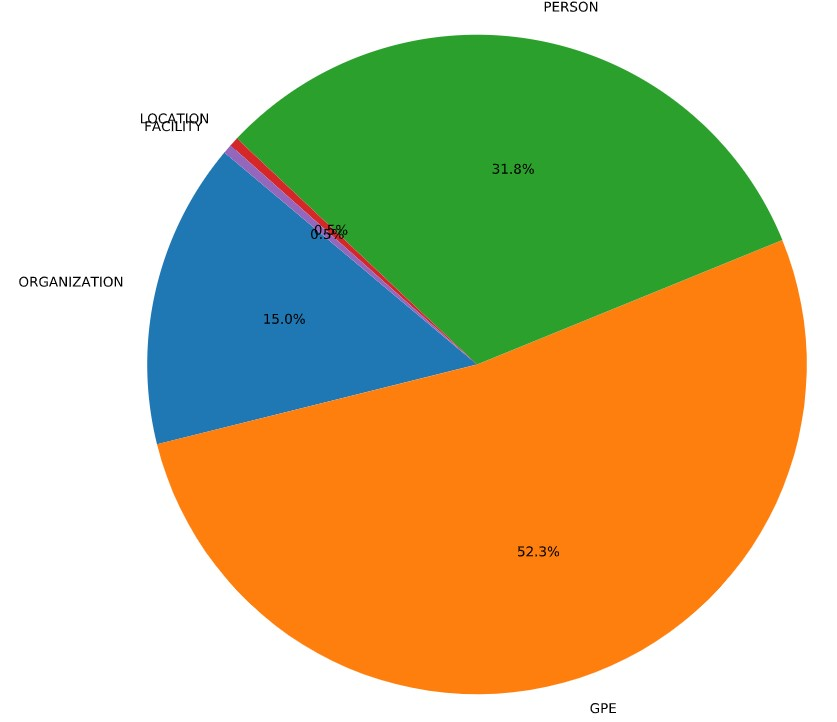

In [8]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
#plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, normalize=False)

# Display the chart
plt.show()

#### Exercise 1.2.3. Stanford library with NLTK
When using the Stanford library with NLTK, what is needed to get started?
>- A. A normal installation of NLTK.
>- B. An installation of the Stanford Java Library.
>- C. Both NLTK and an installation of the Stanford Java Library.
>- D. NLTK, the Stanford Java Libraries and some environment variables to help with integration

#### Answers
>- A. Incorrect! Unfortunately not! We also need to install the Java library.
>- B. Incorrect! We also want to use it with NLTK.
>- C. Nearly correct, but to integrate there is something else needed!
>- D. **Correct!!**

## 2. Introduction to Spacy
### 2.1. Theory
#### What is SpaCy?
`SpaCy` is a `NLP library` similar to Gensim, but with different implementations, including a particular focus on creating NLP pipelines to generate models and corpora.

`SpaCy` is open-source and has several extra libraries and tools built by the same team, including Displacy - a visualization tool for viewing parse trees which uses Node-js to create interactive text.

#### Displacy entity recognition visualizer
For example, if we use the displacy entity recognition visualizer which has a live demo online, we can enter the sentence used in the last video. Here, we can see the SpaCy has identified three named entities and tagged them with the appropriate entity label -- such as location or person. SpaCy also has tools to build word and document vectors from text.

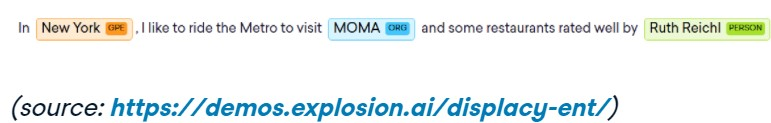

In [9]:
## Hình minh họa Image(fig1, height, width)

#### SpaCy NER
To start using spacy for Named entity recognition, we must first install it and download all the appropriate pre-trained word vectors. You can also train vectors yourself and load them; but the pretrained ones let us get started immediately.

In [10]:
import spacy
nlp = spacy.load('en')
nlp.entity

We can load those into an object, `NLP`, which functions similarly to our Gensim dictionary and corpus. It has several linked objects, including entity which is an Entity Recognizer object from the pipeline module. This is what is used to find entities in the text. Then we load a new document by passing a string into the NLP variable. 

In [11]:
doc = nlp("Berlin is the capital of German, and the residence of Chancellor Angela Markel")
doc.ents

(Berlin, German, Angela Markel)

When the document is loaded, the named entities are stored as a document attribute called ents. We see Spacy properly tagged and identified the three main entities in the sentence. We can also investigate the labels of each entity by using indexing to pick out the first entity and the `label_ attribute` to see the label for that particular entity. Here we see the label for `Berlin` is `GPE` or `Geopolitical entity`. 

Spacy has several other language models available, including advanced German and Chinese implementations. It's a great tool especially if you want to build your own extraction and natural language processing pipeline quickly and iteratively.

In [12]:
doc.ents[0], doc.ents[0].label, doc.ents[0].label_

(Berlin, 384, 'GPE')

####  Why use SpaCy for NER?
Why use Spacy for `NER`? Outside of being able to integrate with the other great Spacy features like easy pipeline creation, it has a different set of entity types and often labels entities differently than `nltk`. 

In addition, Spacy comes with informal language corpora, allowing you to more easily find entities in documents like `Tweets` and chat messages. It's a quickly growing library, so it might even have more languages supported by the time you are watching this theory.

### 2.2. PRACTICES
#### Exercise 2.2.1. Comparing NLTK with spaCy NER
Using the same text you used in the first exercise of this chapter, you'll now see the results using `spaCy's NER` annotator. How will they compare?

The article has been pre-loaded as article. To minimize execution times, you'll be asked to specify the keyword arguments `tagger=False, parser=False, matcher=False` when loading the `spaCy model`, because you only care about the `entity` in this exercise.
#### SOLUTION

In [13]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG unroll.me
ORG Apple
PERSON Travis Kalanick
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


#### Exercise 2.2.2. spaCy NER Categories
Which are the **extra categories** that `spacy` uses compared to `nltk` in its **named-entity recognition**?
>- A. `GPE, PERSON, MONEY`
>- B. `ORGANIZATION, WORKOFART`
>- C. `NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT`
>- D. `EVENT_LOCATION, FIGURE`

#### Answers
>- A. Incorrect! Remember: `nltk` also has `GPE` and `PERSON` types.
>- B. Wrong! The `ORGANIZATION` is not available.
>- **C. Correct!!**
>- D. Incorrect! There is no `FIGURE` category for `spacy`.

## 3. Multilingual NER with polyglot
### 3.1. Theory.
#### What is polyglot?
`Polyglot` is yet another natural language processing library which uses word vectors to perform simple tasks such as `entity recognition`. 

You might be wondering: why do I need to learn another library which uses word vectors? Don't I already have `Gensim` and `Spacy`? And you would be correct. The main benefit and difference of using `Polyglot`, however, is the wide variety of languages it supports. 

`Polyglot` has **word embeddings** for more than `130 languages`! For this reason, you can even use it for tasks like transliteration, as shown here translating some english text into arabic. Transliteration is the ability to translate text by swapping characters from one language to another. 

Of course, any user of `Google translate` or its competitors has seen issues in translation created by `word vectors`, but `Polyglot` is a pretty neat open-source tool to have for so many languages.

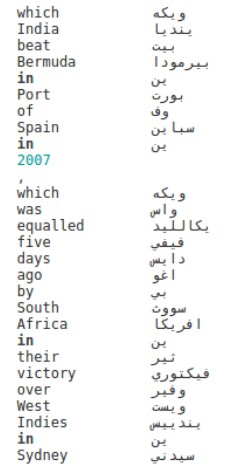

In [14]:
## Hình minh họa Image(fig1, height, width)

#### Spanish NER with polyglot
Instead of transliteration, we are going to use `Polyglot` to perform named entity recognition for some new languages. Similar to `SpaCy`, you need to have the proper vectors downloaded and installed before you begin. 

Once you do, `Polyglot` *does not need to be told which language you are using*. It uses the **language detection model** to do so when the `Text object` is initialized by passing in the document `string`. 

Here is a recent headline from the newspapers in Madrid about the promotion of Madrid by another Spanish politician. 

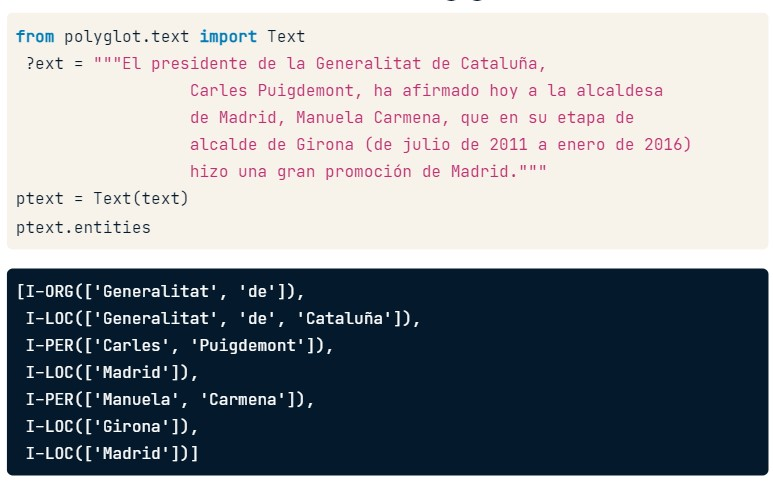

In [15]:
## Hình minh họa Image(fig1, height, width)

If you know `Spanish`, (or even if you don't and you take a look at the **capitalized words**), you can see quite a few titles, locations and people. When we call the entities attribute of the text object, we can see a list of entity chunks found by `Polyglot` while parsing the text. 

Each `chunk` has a `label`, represented by the symbols starting with I-, such as I-ORG representing an organization, `I-LOC` representing a location and I-PER representing a person.

You may notice some possible duplication in the first two entities found, separating `Generalitat de` and `Catalunya`. This makes some sense because the phrase represents both a location `Catalunya` and a organization the `Generalitat`. That said, you may need to clean up returned entities when they don't match your expected labels or have substrings you would rather not track.

#### Requirement

In [16]:
#!pip install --upgrade pip
#!apt-get install -y libicu-dev
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor
!polyglot download embeddings2.en pos2.en
!polyglot download ner2.en
!polyglot download sentiment2.en

     |████████████████████████████████| 233 kB 420 kB/s eta 0:00:01
  Created wheel for pyicu: filename=PyICU-2.6-cp37-cp37m-linux_x86_64.whl size=1465353 sha256=b4c5ba4ebd9ccdeb06d77b1bd59a0247d489e0871c83ebce5bb57f1ba2b38615
  Stored in directory: /root/.cache/pip/wheels/83/52/fd/956f3b17a6a946018f20f6f402d572c70e7d1820de0c46917c
Successfully built pyicu
     |████████████████████████████████| 41.4 MB 166 kB/s eta 0:00:011   |███▍                            | 4.4 MB 419 kB/s eta 0:01:29     |███████████▊                    | 15.2 MB 29.1 MB/s eta 0:00:01     |██████████████▋                 | 18.9 MB 29.1 MB/s eta 0:00:01
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834344 sha256=d611ace1b1015ccc0ee3c819aa6f560b231a59b9ece0f95e5cf403c2fb3839c5
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2
[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]    

### 4.2. PRACTICES
#### Exercise 4.2.1. French NER with polyglot I
In this exercise and the next, you'll use the polyglot library to identify French entities. The library functions slightly differently than spacy, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in article. 

Additionally, the Text class of polyglot has been imported from polyglot.text.
#### SOLUTION

In [17]:
import polyglot
from polyglot.text import Text, Word

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

['Uber']
['Uber']
['notionally']
['Uber']
['Uber']
['Travis', 'Kalanick']
['Uber']
['Tim', 'Cook']
['Apple']
['Yahoo']
['Marissa', 'Mayer']
<class 'polyglot.text.Chunk'>


#### Exercise 4.2.2. French NER with polyglot II
Here, you'll complete the work you began in the previous exercise.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.
#### SOLUTION.

In [18]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Uber'), ('I-PER', 'Uber'), ('I-PER', 'notionally'), ('I-PER', 'Uber'), ('I-PER', 'Uber'), ('I-PER', 'Travis Kalanick'), ('I-PER', 'Uber'), ('I-PER', 'Tim Cook'), ('I-ORG', 'Apple'), ('I-ORG', 'Yahoo'), ('I-PER', 'Marissa Mayer')]


#### Exercise 4.2.3. Spanish NER with polyglot
You'll continue your exploration of polyglot now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

The `Text` object has been created as txt, and each entity has been printed, as you can see in the IPython Shell.

Your specific task is to determine how many of the entities contain the words `"Márquez"` or `"Gabo"` - these refer to the same person in different ways!
#### SOLUTION

In [21]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if ('Gabo' in ent) | ('Márquez' in ent):
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

29
0.28431372549019607
